**Text Classification (Spam Detection)**

Text classification is a fundamental task in Natural Language Processing (NLP), used in applications like spam detection, sentiment analysis, and topic categorization. In this project, we focus on classifying text into different categories using Machine Learning and Deep Learning models.

Algorithms used in this project are:

1.   Logistic Regression
2.   Naive Bayes
3.   Random Forest Classifier
4.   XGBoost Classifier
5.   LSTM Model
6.   SVM Model (SVC)  

**Features** : **Message , Class (0/1)**

**Metrics** : Confusion Matrix, Classification Report, PR Curve (Precision-Recall curve)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [12]:
data = pd.read_csv('spam.csv',encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
data['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [14]:
#filtering data
data = data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#renaming columns
data = data.rename(columns = {'v1':'Class','v2':'Message'})
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
!pip install contractions

import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.5 MB/s eta 0:00:00


In [21]:
#defining function to clean data
def clean_data(text):
  text = text.lower()
  text = contractions.fix(text)

  text = re.sub(r'[^\w\s]','',text)
  tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

  return ' '.join(tokens)


In [22]:
data['Message'] = data['Message'].apply(clean_data)
data['Message']

,Message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,dun say early hor c already say
4,nah think go usf life around though
...,...
5567,2nd time tried 2 contact å750 pound prize 2 cl...
5568,ì_ b going esplanade fr home
5569,pity mood soany suggestion
5570,guy bitching acted like would interested buyin...


In [23]:
#making outcomes as :
#0 - Not spam, 1 - spam

data['Class'] = data['Class'].map({'ham':0,'spam':1})
data['Class'].value_counts()

,count
Class,
0,4825
1,747


In [32]:
#splitting label and data
y = data['Class']
X = data['Message']

In [33]:
#converting string (text) into numerical values

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(X)
X.shape

(5572, 5000)

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority',random_state = 20)
X_res,y_res = smote.fit_resample(X,y)

In [41]:
from collections import Counter

print(Counter(y_res))   #thus occurence of each class is same now

Counter({0: 4825, 1: 4825})


In [94]:
from sklearn.model_selection import train_test_split

X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_res,y_res,test_size = 0.2,random_state = 23)
X_train_res.shape,X_test_res.shape,y_train_res.shape,y_test_res.shape

((7720, 5000), (1930, 5000), (7720,), (1930,))

In [95]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_res.toarray(),y_train_res)

y_naive = gaussian.predict(X_test.toarray())

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       969
           1       0.88      1.00      0.94       961

    accuracy                           0.93      1930
   macro avg       0.94      0.93      0.93      1930
weighted avg       0.94      0.93      0.93      1930



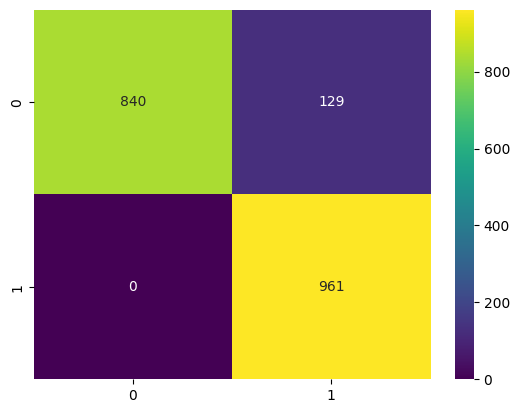

In [96]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test_res,y_naive))
cm = confusion_matrix(y_test_res,y_naive)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'viridis')

plt.show()

In [98]:
#searching for best parameters to Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'C':[0.01,0.1,1,10],
}
grid = GridSearchCV(logistic,params,cv = 5)
grid.fit(X_train_res,y_train_res)

print(grid.best_params_)

{'C': 10}


In [99]:
logistic = LogisticRegression(C = 10)
logistic.fit(X_train_res,y_train_res)

y_logistic = logistic.predict(X_test_res)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       969
           1       1.00      0.99      1.00       961

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



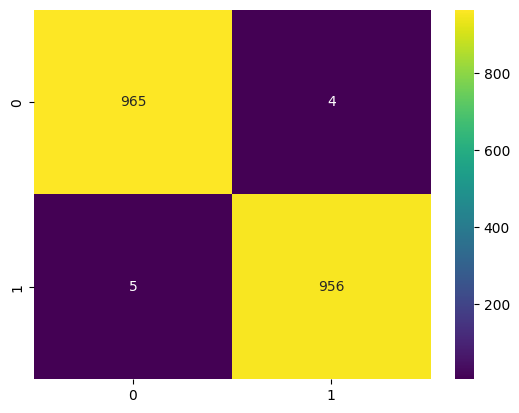

In [100]:
print(classification_report(y_test,y_logistic))

cm_log = confusion_matrix(y_test_res,y_logistic)
sns.heatmap(cm_log,annot = True,cmap = 'viridis',fmt = 'd')

plt.show()

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
params = {
    'max_depth':[4,6,9,10,15],
    'n_estimators':[50,100,200]
}
grid = GridSearchCV(rfc,params,cv = 5)
grid.fit(X_train_res,y_train_res)

print(grid.best_params_)

{'max_depth': 15, 'n_estimators': 100}


In [102]:
rfc = RandomForestClassifier(max_depth = 15,n_estimators = 100)
rfc.fit(X_train_res,y_train_res)

y_rfc = rfc.predict(X_test_res)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       969
           1       0.99      0.93      0.96       961

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930



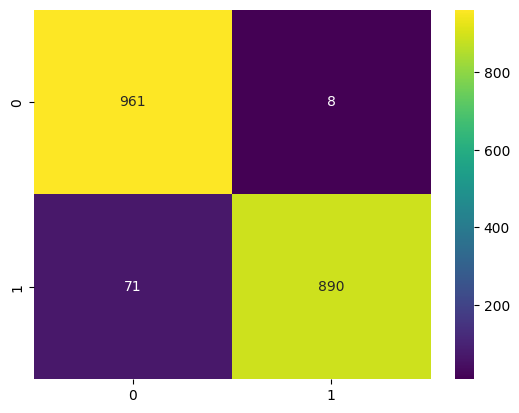

In [103]:
print(classification_report(y_test_res,y_rfc))

cm_rfc = confusion_matrix(y_test_res,y_rfc)
sns.heatmap(cm_rfc,annot = True,cmap = 'viridis',fmt = 'd')
plt.show()

In [104]:
from sklearn.svm import SVC

svm_model = SVC()

In [105]:
params = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto']
}
grid = GridSearchCV(svm_model,params,cv = 5)
grid.fit(X_train_res,y_train_res)

print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [106]:
svm_model = SVC(C = 10,gamma = 'scale',kernel = 'rbf')

svm_model.fit(X_train_res,y_train_res)

y_svm = svm_model.predict(X_test_res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       961

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



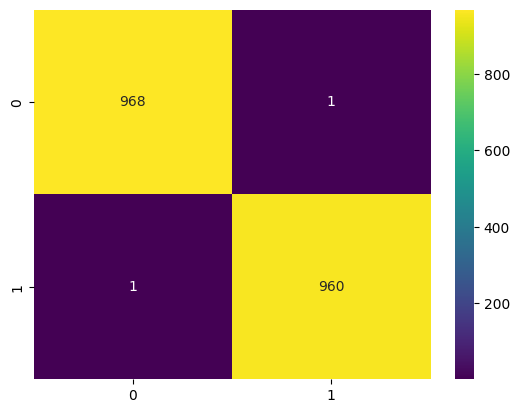

In [107]:
print(classification_report(y_test_res,y_svm))

cm_svm = confusion_matrix(y_test_res,y_svm)
sns.heatmap(cm_svm,annot = True,cmap = 'viridis',fmt = 'd')
plt.show()

In [109]:
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300]
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train_res, y_train_res)

print(grid.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


In [110]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.2,max_depth = 3,n_estimators = 300)
xgb_model.fit(X_train,y_train)

y_xgb = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.99      0.98      0.98       961

    accuracy                           0.98      1930
   macro avg       0.99      0.98      0.98      1930
weighted avg       0.99      0.98      0.98      1930



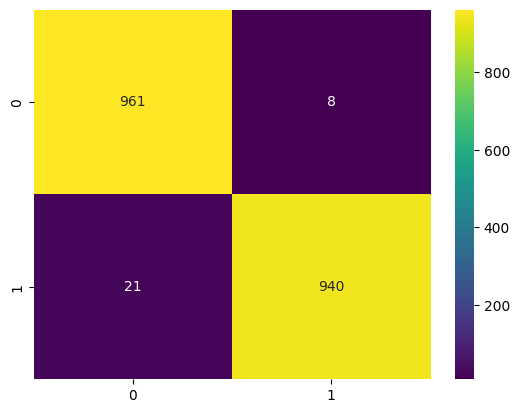

In [112]:
print(classification_report(y_test_res,y_xgb))

cm_xbg = confusion_matrix(y_test_res,y_xgb)

sns.heatmap(cm_xbg,annot = True,cmap = 'viridis',fmt = 'd')
plt.show()

In [113]:
#trying deep learning algorithm
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.metrics import AUC

In [114]:
tokenizer = Tokenizer(num_words = 6000)
tokenizer.fit_on_texts(data['Message'])

X = tokenizer.texts_to_sequences(data['Message'])

y = data['Class']

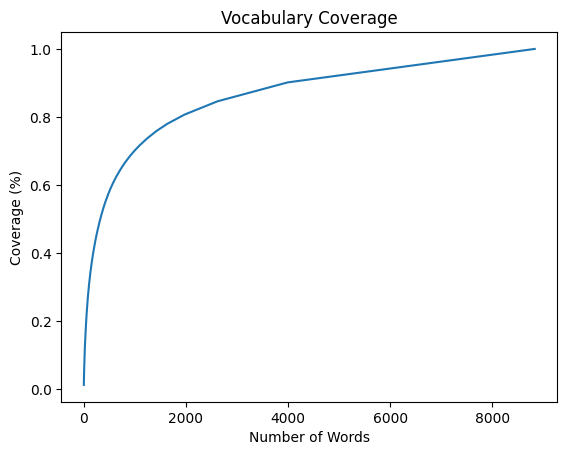

In [79]:
#analysing vocab coverage

word_counts = tokenizer.word_counts
sorted_counts = sorted(word_counts.values(),reverse = True)
cumulative_counts = np.cumsum(sorted_counts) / sum(sorted_counts)  # Normalizing


plt.plot(range(1, len(sorted_counts) + 1), cumulative_counts)
plt.xlabel("Number of Words")
plt.ylabel("Coverage (%)")
plt.title("Vocabulary Coverage")
plt.show()
#observing graph we set num_words as 6000


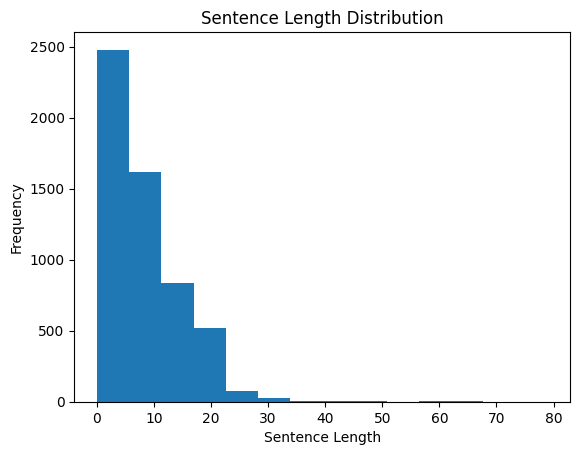

In [84]:
sentence_length = [len(sen) for sen in X]

plt.hist(sentence_length,bins = 14)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.show()

In [115]:
#thus maxlen = 30
X = pad_sequences(X,maxlen = 30)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 30)

In [116]:
#class_weight added to make learning better for imbalanced data
class_weights = compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train)
                  ,y = y_train)

class_weights = dict(enumerate(class_weights))

model = Sequential([
    Embedding(input_dim = 6000,output_dim = 128,input_length = X_train.shape[1]),
    LSTM(64,return_sequences = True,recurrent_dropout = 0.3),
    LSTM(32),Dropout(0.5),
    Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',loss = BinaryFocalCrossentropy(from_logits = True),metrics = ['accuracy',AUC(name = 'auc')])

model.fit(X_train,y_train,epochs = 5,batch_size = 32,
          validation_data = (X_test,y_test),class_weight = class_weights)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.8876 - auc: 0.8196 - loss: 0.1576 - val_accuracy: 0.9691 - val_auc: 0.9739 - val_loss: 0.1627
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9902 - auc: 0.9756 - loss: 0.1049 - val_accuracy: 0.9770 - val_auc: 0.9713 - val_loss: 0.1603
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9910 - auc: 0.9846 - loss: 0.1030 - val_accuracy: 0.9792 - val_auc: 0.9687 - val_loss: 0.1602
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.9970 - auc: 0.9920 - loss: 0.1003 - val_accuracy: 0.9799 - val_auc: 0.9690 - val_loss: 0.1601
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9955 - auc: 0.9898 - loss: 0.1004 - val_accuracy: 0.9806 - val_auc: 0.9584 - val_loss: 0.1597


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1220
           1       0.95      0.90      0.92       173

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393



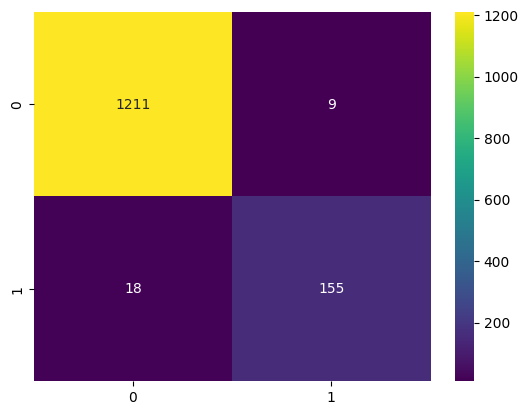

In [117]:
y_model = model.predict(X_test)
y_model = (y_model > 0.5).astype(int) #convert to 0/1

print(classification_report(y_test,y_model))

cm_model = confusion_matrix(y_test,y_model)
sns.heatmap(cm_model,annot = True,cmap = 'viridis',fmt = 'd')

plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


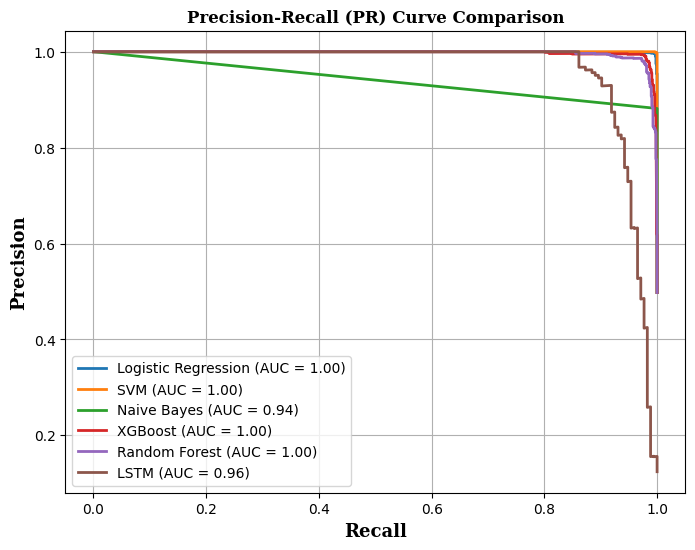

In [126]:
from sklearn.metrics import precision_recall_curve, auc

# Computing Precision-Recall for each model
precision_lr, recall_lr, _ = precision_recall_curve(y_test_res, logistic.predict_proba(X_test_res)[:,1])
pr_auc_lr = auc(recall_lr, precision_lr)

precision_svm, recall_svm, _ = precision_recall_curve(y_test_res, svm_model.decision_function(X_test_res))
pr_auc_svm = auc(recall_svm, precision_svm)

precision_naive,recall_naive, _ = precision_recall_curve(y_test_res,gaussian.predict_proba(X_test_res.toarray())[:,1])
pr_auc_naive = auc(recall_naive,precision_naive)

precision_xgb,recall_xgb, _ = precision_recall_curve(y_test_res,xgb_model.predict_proba(X_test_res)[:,1])
pr_auc_xgb = auc(recall_xgb,precision_xgb)

precision_rfc,recall_rfc,_ = precision_recall_curve(y_test_res,rfc.predict_proba(X_test_res)[:,1])
pr_auc_rfc = auc(recall_rfc,precision_rfc)

precision_lstm, recall_lstm, _ = precision_recall_curve(y_test,model.predict(X_test).ravel())
pr_auc_lstm = auc(recall_lstm, precision_lstm)


# Plotting PR Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AUC = {pr_auc_lr:.2f})", lw=2)
plt.plot(recall_svm, precision_svm, label=f"SVM (AUC = {pr_auc_svm:.2f})", lw=2)
plt.plot(recall_naive, precision_naive, label=f"Naive Bayes (AUC = {pr_auc_naive:.2f})", lw=2)
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (AUC = {pr_auc_xgb:.2f})", lw=2)
plt.plot(recall_rfc, precision_rfc, label=f"Random Forest (AUC = {pr_auc_rfc:.2f})", lw=2)
plt.plot(recall_lstm, precision_lstm, label=f"LSTM (AUC = {pr_auc_lstm:.2f})", lw=2)

# Formatting
plt.xlabel("Recall",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.ylabel("Precision",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.title("Precision-Recall (PR) Curve Comparison",family = 'serif',fontweight = 'bold')
plt.legend(loc="lower left")
plt.grid()
plt.show()


Observing above Graph, we see that almost all Traditional ML algorithms as well as deep learning algorithms performed really well on our dataset. We used SMOTE sampling technique which really improved performance and allowed dataset to become balanced.
Thus this concludes our project of exploring different models to create Spam Detection (Text Classification) Model.